컴퓨터전자시스템공학과 / 201904458 / 이준용


**Homework #1. linear regression model**

###이번 실습의 학습 목표 입니다.
1. 주어진 데이터를 불러오는 과정 익히기.
2. train loader & test loader 만들기.
3. model에 들어갈 input data preprocessing 해보기.
4. 간단한 linear regression model 구현해보기.
5. pytorch에 구현되어있는 loss function, optimizer 사용해보기.
6. 학습과정에서의 이해를 돕기 위해 기능들이 수행하는 역할에 대해 공부하기.

 + input값 채우기.
7.  Linear regression이 왜 Neural network인지 해당 과제를 예시로 들어 설명하기.

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import torch
# 신경망(neural network) 구성 요소를 제공
from torch import nn
# 최적화 알고리즘(예: SGD, Adam 등)을 제공
import torch.optim as optim
# Variable은 자동 미분 기능을 가진 텐서
from torch.autograd import Variable
# 배치 처리, 셔플링 등 데이터 로딩
from torch.utils.data import dataloader

import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import os

import matplotlib.pyplot as plt
# 손으로 쓴 숫자 이미지인 MNIST 데이터셋
from torchvision.datasets.mnist import MNIST
# PIL img나 numpy ndarray 형태의 이미지데이터를 0-1 범위의 텐서(Tensor) 형태로 변형
from torchvision.transforms import ToTensor

In [3]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

print('Current cuda device is', device)

Current cuda device is cpu


* 주어진 데이터를 불러오는 과정 익히기.

In [4]:
training_data=MNIST(root="./", train=True, download=True, transform=ToTensor())
test_data=MNIST(root="./", train=False, download=True, transform=ToTensor())

print("training data len : ",len(training_data))
print("test data len : ",len(test_data))
print(training_data)

# data image 9장 불러오기 - 'import matplotlib.pyplot as plt' 사용


training data len :  60000
test data len :  10000
Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor()


* train loader & test loader 만들기.

In [5]:
# train loader & test loader 만들기 (batch size : 32/ train : shuffle=True, test : shuffle=False)
# 데이터셋을 DataLoader에 넣어 Train Loader와 Test Loader를 생성합니다.
from torch.utils.data import DataLoader
batch_size = 32  # 미니배치 크기 32 설정함
shuffle_train = True  # 학습 데이터(shuffle_train)은 데이터를 섞음
shuffle_test = False  # 테스트 데이터(shuffle_test)는 섞지 않음.

train_loader = DataLoader(training_data, batch_size=batch_size, shuffle=shuffle_train)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=shuffle_test)

* input data preprocessing 해보기.

In [6]:
import numpy as np
# numpy를 사용하여 input data를 배열 형태로 만들기(type=np.float32)
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)
# numpy를 사용하여 input data를 배열 형태로 만들기(type=np.float32)
y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

* 간단한 linear regression model 구현해보기.

In [7]:
class LinearRegression(nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearRegression, self).__init__()
        # 선형 레이어 초기화: 입력 차원 ->출력 차원
        self.linear = nn.Linear(inputSize, outputSize)
#super()로 기반 클래스(부모 클래스)를 초기화해줌으로써,
#기반 클래스의 속성을 subclass가 받아오도록 한다.(초기화를 하지 않으면, 부모 클래스의 속성을 사용할 수 없음)
# 좀 더 명확하게 super를 사용하기 위해서는 
# 단순히 super().__init__()을 하는 것이 아니라 super(파생클래스, self).__init__() 을 해준다.
#이와 같이 적어주면 기능적으로 차이는 없지만,
# 파생클래스와 self를 넣어서 현재 클래스가 어떤 클래스인지 명확하게 표시해줄 수 있다.
    def forward(self, x):
        # 순전파 연산: 선형 레이어를 통한 입력 데이터 변환
        out = self.linear(x)
        return out
#   순전파 함수에서는 입력 데이터의 텐서를 받고 출력 데이터의 텐서를 반환해야 합니다.
# 텐서들 간의 임의의 연산뿐만 아니라, 생성자에서 정의한 Module을 사용할 수 있습니다.

In [8]:
inputDim = 1 # 'x'의 차원이 1이 되는 이유를 설명하시오. :

#Linear Regression모델(선형 회귀 모델)은 주로 하나의 입력 변수가 출력 변수를 예측하는 간단한 선형 모델.
# MNIST 데이터셋은 손으로 쓴 숫자(0부터 9까지)의 이미지를 포함하고 있다. 
# 각 이미지는 28x28 픽셀로 구성되어 있으며, 이것이 'x' 즉, 입력 변수가 된다.
# 입력 변수 'x'가 하나의 차원을 가질 때, 예측 문제는 'x'를 사용하여 'y'를 예측하는 문제가 되며, 
# 이는 하나의 입력 차원을 가지는 것을 의미한다.
# 그러므로  'inputDim = 1'로 설정된 것은 하나의 입력 변수만을 가지고 있음을 나타낸다고 보여진다.

outputDim = 1 # 'y'의 차원이 1이 되는 이유를 설명하시오. :

#Linear Regression모델(선형 회귀 모델)은 연속형 값을 예측하는 회귀 문제를 다룬다. 
# 'y', 즉 출력 변수 또한 연속적인 값.
# 따라서 예측된 값 'y'의 출력 차원은 1이 된다. 
# 다른말로, 예측하려는 결과값이 하나라는 것을 나타낸다.
# 결론은  inputDim과 outputDim 모두 1로 설정된 것은 
# 단일 입력변수 x 로부터 단일 출력변수 y를 예측하는 선형회귀문제를 다룬다는 것을 의미한다.

learningRate = 0.01
epochs = 100

model = LinearRegression(inputDim, outputDim)

if torch.cuda.is_available():
    model.cuda()

* pytorch에 구현되어있는 loss function, optimizer 사용해보기.

In [9]:
loss_fn = nn.MSELoss() 
# 주어진 코드에서 loss_fn을 MSE (Mean Squared Error) Loss Function으로 설정하려고 한다. 
# MSE는 회귀 문제에서 예측값과 실제값 간의 평균 제곱 오차를 계산하는 함수로, 
# 이를 최소화하는 것이 회귀 모델의 목표이다.
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
#주어진 코드에서 optimizer를 SGD (Stochastic Gradient Descent) Optimizer로 설정하려고 한다.
# SGD는 모델의 가중치를 업데이트하는 최적화 알고리즘 중 하나로, 
# 학습률(learning rate),모멘텀(momentum),가중치 감소(weight decay) 
# 하이퍼파라미터를 사용하여 모델 파라미터를 조정합니다.





* 학습과정에서의 이해를 돕기 위해 기능들이 수행하는 역할에 대해 공부하기.

In [10]:
for epoch in range(epochs):
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # optimizer를 zero_grad 시키는 이유: epochs마다 반복문이 도는데 
    # minibatch의 그래디언트 정보를 초기화하여 현재 미니배치의 그래디언트로 업데이트하기 위해서이다.
    # optimizer.zero_grad()를 주석처리해서 run해봤는데 매개변수 변화도가 누적되어 수치에 의미가
    # 없어 졌습니다. for 루프마다 0으로 만들어야 오차를 backward하는게 가능한 것 같습니다.
    optimizer.zero_grad()

    # 모델을 통해 입력 데이터를 순전파하여 예측값을 얻는다.
    outputs = model(inputs)

    # 손실 함수를 사용하여 예측값과 실제값 간의 Loss를 계산한다.
    loss = loss_fn(outputs, labels)
    print(loss)

    # loss function을 backward 시키는 이유:
    # loss를 모델 파라미터에 대해 미분하여 그래디언트를 계산하고, 이를 사용하여 모델 파라미터를 업데이트한다.
    # forward()함수와 다르게 어떤 값에 대한 출력 텐서의 그래디언트를 전달받아, 
    # 동일한 값에 대한 입력 텐서의 변호도를 계산하는것 같습니다.
    loss.backward()

    # optimizer.step()을 사용하여 모델 파라미터를 업데이트한다.
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))


tensor(64.0950, grad_fn=<MseLossBackward0>)
epoch 0, loss 64.09503936767578
tensor(5.2280, grad_fn=<MseLossBackward0>)
epoch 1, loss 5.228044509887695
tensor(0.4265, grad_fn=<MseLossBackward0>)
epoch 2, loss 0.42645180225372314
tensor(0.0348, grad_fn=<MseLossBackward0>)
epoch 3, loss 0.03480072319507599
tensor(0.0029, grad_fn=<MseLossBackward0>)
epoch 4, loss 0.002854716731235385
tensor(0.0002, grad_fn=<MseLossBackward0>)
epoch 5, loss 0.0002487878082320094
tensor(3.6072e-05, grad_fn=<MseLossBackward0>)
epoch 6, loss 3.6071785871172324e-05
tensor(1.8539e-05, grad_fn=<MseLossBackward0>)
epoch 7, loss 1.853928370110225e-05
tensor(1.6935e-05, grad_fn=<MseLossBackward0>)
epoch 8, loss 1.693473859631922e-05
tensor(1.6632e-05, grad_fn=<MseLossBackward0>)
epoch 9, loss 1.6632107872283086e-05
tensor(1.6436e-05, grad_fn=<MseLossBackward0>)
epoch 10, loss 1.643628638703376e-05
tensor(1.6254e-05, grad_fn=<MseLossBackward0>)
epoch 11, loss 1.62539381562965e-05
tensor(1.6072e-05, grad_fn=<MseLossBa

[[ 0.9954243]
 [ 2.9960833]
 [ 4.9967422]
 [ 6.997401 ]
 [ 8.99806  ]
 [10.998719 ]
 [12.999378 ]
 [15.000037 ]
 [17.000696 ]
 [19.001356 ]
 [21.002014 ]]


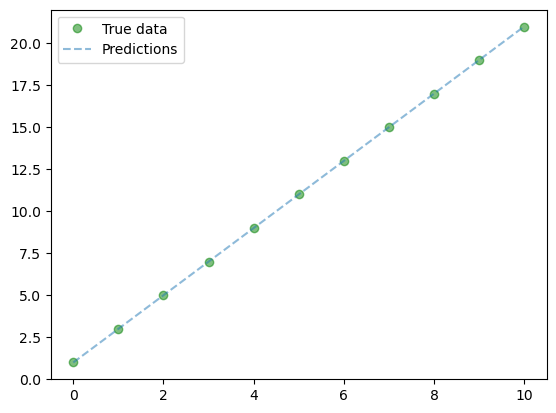

In [11]:
with torch.no_grad():
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

* Linear regression이 왜 Neural network인지 해당 과제를 예시로 들어 설명하기.

Neural Network의 핵심 구성 요소 중 하나는 뉴런이다. 
각 뉴런은 입력값에 대한 가중치를 가지고, 이 가중치를 사용하여 입력값을 변환하고 활성화 함수를 통과시킵니다. 
이런 관점에서 Linear Regression 모델은 Neural Network의 가장 간단한 형태 중 하나이다.

y = wx + b


입력 변수(x): Linear Regression에서 입력 변수(x)는 입력층(input layer)에 해당한다.
입력층은 데이터의 특성(feature)을 나타내며, 이 특성에 대한 가중치(weight)를 곱하고 합산하여 출력을 계산한다. b는 bias 편향.

가중치(w): Linear Regression에서는 가중치가 각 입력 변수와 관련이 있는데,
Neural Network의 뉴런에 있는 시냅스 가중치와 마찬가지로 Linear Regression의 입력 변수에 가중치를 곱하여 가중합을 계산합니다. 

출력(y): Linear Regression에서 출력은 예측값을 나타난다. 
Neural Network에서도 출력층(output layer)인 Axon이 있고, 여기에서 최종 예측이 이루어지는것이 비슷하다. 다만, Linear Regression에서는 활성화 함수는 정의 되지 않음.

활성화 함수(Activation Function): Linear Regression에서는 활성화 함수를 사용하지 않는다. 그러나 Neural Networ에서는 위의 정보들이 Axon에서 비선형 활성화 함수(예: ReLU, Sigmoid)를 사용하여 뉴런의 출력을 변환한다.

Loss Function과 최적화(Optimization): 
Neural Network와 마찬가지로 Linear Regression에서도 Loss Function을 사용하여 예측값과 실제값 간의 오차를 계산하고,
이 오차를 최소화하기 위해 최적화 알고리즘을 사용한다. 주로 평균 제곱 오차(Mean Squared Error, MSE)를 사용하며, 
이를 최소화하기 위해 스토캐스틱 경사 하강법(Stochastic Gradient Descent)을 적용했다.


뉴런, 가중치 , 출력층, Loss Function, 최적화와 같은 개념은 Neural Network와 Linear Regression 간에 공통적으로 사용되므로, 
따라서 Linear Regression은 입력 변수와 가중치를 조합하여 출력을 계산하는 모델로, 
이러한 모델은 Neural Network형태 중 하나로 볼 수 있다. 